# K-Means Clustering in Python
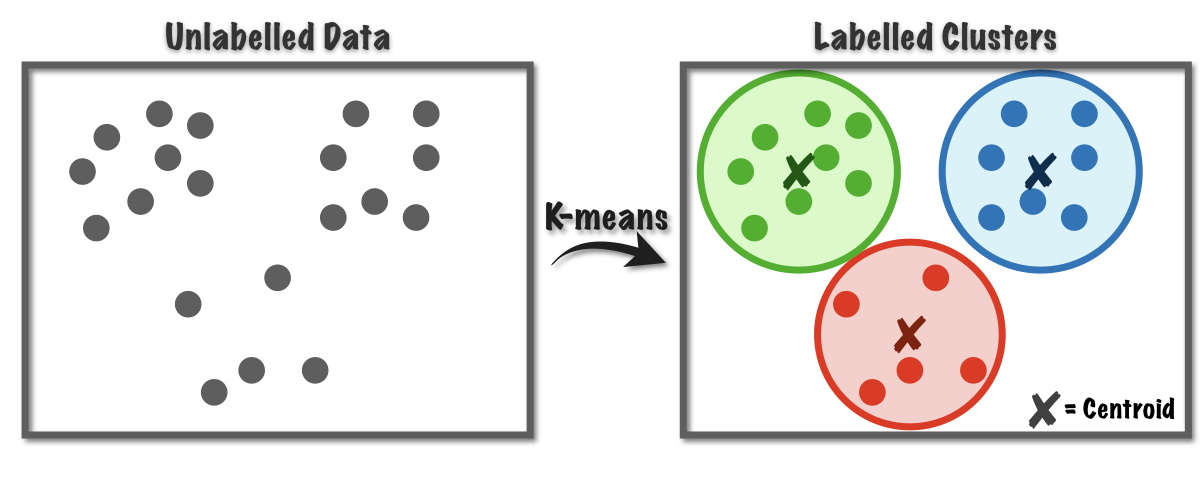

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Read and display data
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
# For this project we will only be using two variable, annual income and spending score
X = dataset.iloc[:,[3,4]].values

C:\Users\shaya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


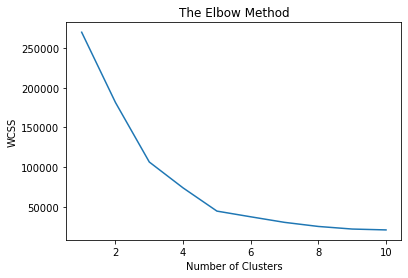

In [20]:
# Now we use the "Elbow Method" to select the optimal number of clusters for K-means clustering
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

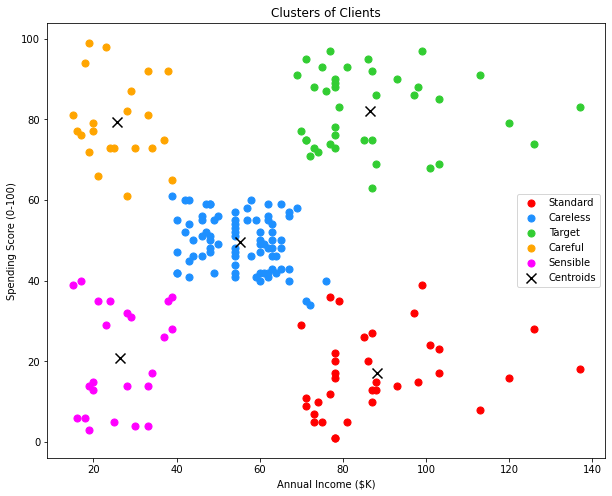

In [26]:
# From the graph above we can see that the optimal number of clusters is 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters 
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c ='red',        label ='Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c ='dodgerblue', label ='Careless')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c ='limegreen',  label ='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c ='orange',     label ='Careful')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c ='magenta',    label ='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black',
           marker='x', label='Centroids')

plt.title("Clusters of Clients")
plt.xlabel("Annual Income ($K)")
plt.ylabel("Spending Score (0-100)")
plt.legend()
plt.show()